# 12/05 - Pair Programming Limpieza 7 - Guadalupe & Lara

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

from scipy import stats 

pd.options.display.max_columns = None 
df = pd.read_csv("5.Ataques_enproceso_5.csv", index_col = 0)

En este ejercicio de pair programming utilizaremos el csv creado en el ejercicio de pair de Limpieza IV, ese en el que codificamos las variables categóricas.

El objetivo de este ejercicio es realizar la normalización o estandarización de las variables numericas de nuestro csv.

Este ejericio es suuuper cortito porque solo lo haremos sobre una columna, la de age. Recordemos de la lección que hay cierto tipo de columnas que no tiene sentido normalizar o estandarizar, como puede ser la latitud y longitud o incluso el año. En este contexto, vemos entonces que solo nos queda age!

**¿Qué tendréis que hacer?**

-*Pregunta teórica: Podríais explicar en pocas palabras ¿Qué es lo que hace exactamente el método boxcox de normalización de datos?*


👩🏽‍🦰👩🏽‍🦱💬   
El método "boxcox" transforma los datos de una variable a una distribución normalizada dentro de un rango, que generalmente es entre -5 y 5. Requiere de una entrada positiva obligatoriamente.

-*Normalizad los datos de la columna age. Utilizad los métodos aprendidos y explicad las diferencias entre cada uno de ellos. Para cada transformación que hagáis cread una columna nueva.*

-*Guardad el csv con los cambios*

In [24]:
df.head()

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date,age2,age2_fillna,age_mean,sex_moda,type_moda
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,57.000000,NaN,57.000000,F,Boating
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018,11.000000,NaN,11.000000,F,Unprovoked
2,2018.06.09,2018.0,Invalid,usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,unspecified,N,Injury to left lower leg from surfboard skeg,09-Jun-2018,48.000000,NaN,48.000000,M,Invalid
3,2018.06.08,2018.0,Unprovoked,australia,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,unspecified,N,Minor injury to lower leg,08-Jun-2018,26.473742,NaN,26.473742,M,Unprovoked
4,2018.06.04,2018.0,Provoked,mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,tiger_shark,N,Lacerations to leg & hand shark PROVOKED INCIDENT,04-Jun-2018,26.473742,NaN,26.473742,M,Provoked


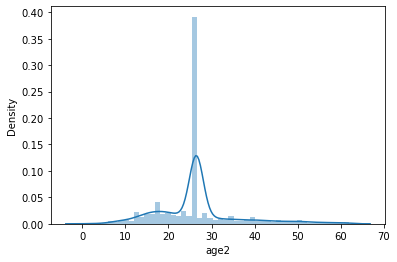

In [25]:

sns.distplot(df["age2"])
plt.show()

Método "manual"

In [26]:
media = df["age2"].mean()
maximo = df["age2"].max() 
minimo = df["age2"].min()
df["age2_manual"] = (df["age2"] - media) / (maximo - minimo )
df.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date,age2,age2_fillna,age_mean,sex_moda,type_moda,age2_manual
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,57.0,NaN,57.0,F,Boating,0.500430
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018,11.0,NaN,11.0,F,Unprovoked,-0.253668


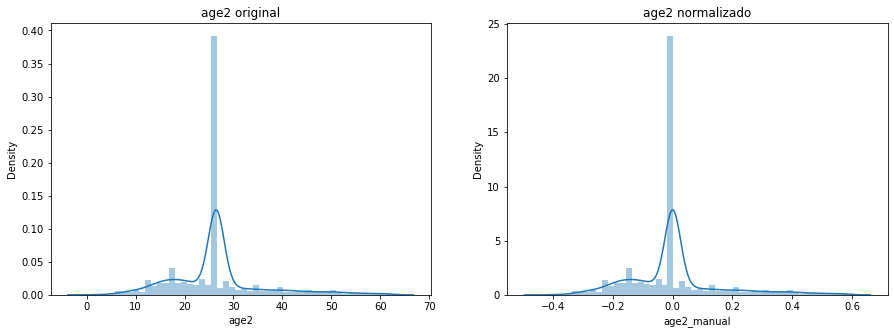

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age2 original')
axes[1].set_title('age2 normalizado')

sns.distplot(df['age2'] ,ax = axes[0])
sns.distplot(df['age2_manual'], ax = axes[1]);

Transformación "logarítmica"

In [28]:
df['age2_log'] = df['age2'].apply(lambda x: np.log(x) if x != 0 else 0)
df.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date,age2,age2_fillna,age_mean,sex_moda,type_moda,age2_manual,age2_log
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,57.0,NaN,57.0,F,Boating,0.500430,4.043051
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018,11.0,NaN,11.0,F,Unprovoked,-0.253668,2.397895


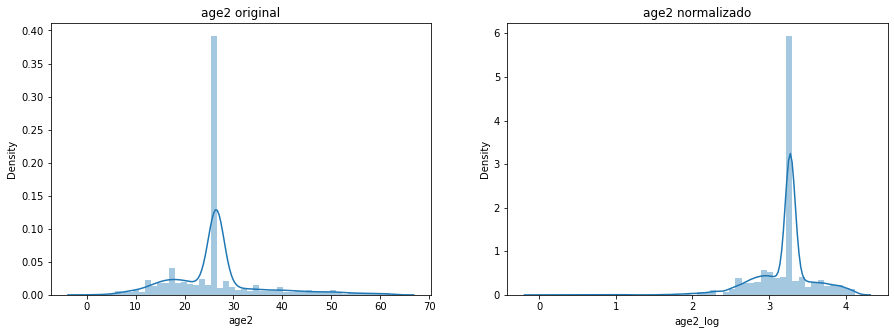

In [29]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age2 original')
axes[1].set_title('age2 normalizado')

sns.distplot(df['age2'] ,ax = axes[0])
sns.distplot(df['age2_log'], ax = axes[1]);

Transformación "raíz cuadrada"

In [30]:
df['age2_rc'] = df['age2'].apply(lambda x: math.sqrt(x))
df.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date,age2,age2_fillna,age_mean,sex_moda,type_moda,age2_manual,age2_log,age2_rc
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,57.0,NaN,57.0,F,Boating,0.500430,4.043051,7.549834
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018,11.0,NaN,11.0,F,Unprovoked,-0.253668,2.397895,3.316625


<AxesSubplot:title={'center':'age2 normalizado'}, xlabel='age2_rc', ylabel='Density'>

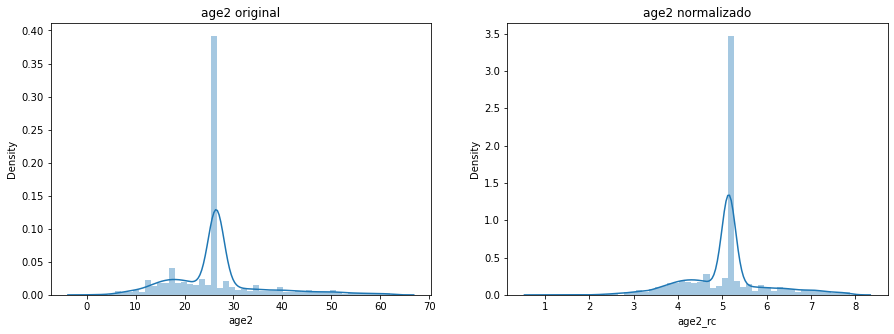

In [31]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age2 original')
axes[1].set_title('age2 normalizado')

sns.distplot(df['age2'] ,ax = axes[0])
sns.distplot(df['age2_rc'], ax = axes[1])

Transformación "boxcox"

In [32]:
df['age2_bc'], lambda_ajustada = stats.boxcox(df['age2'])
df.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date,age2,age2_fillna,age_mean,sex_moda,type_moda,age2_manual,age2_log,age2_rc,age2_bc
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,57.0,NaN,57.0,F,Boating,0.500430,4.043051,7.549834,11.824365
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018,11.0,NaN,11.0,F,Unprovoked,-0.253668,2.397895,3.316625,4.384016


<AxesSubplot:title={'center':'age2 normalizado'}, xlabel='age2_bc', ylabel='Density'>

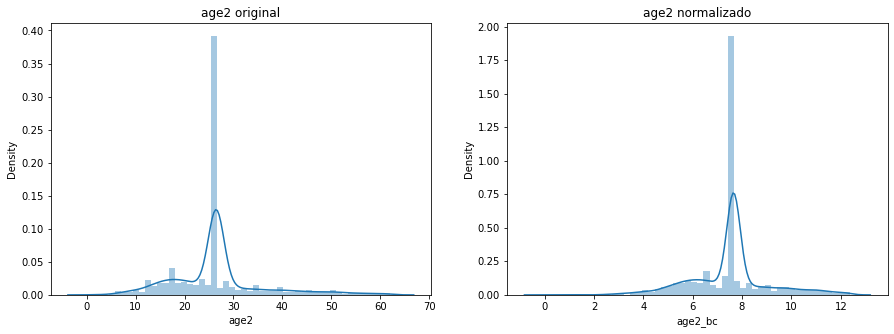

In [33]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age2 original')
axes[1].set_title('age2 normalizado')

sns.distplot(df['age2'] ,ax = axes[0])
sns.distplot(df['age2_bc'], ax = axes[1])

Transformación "minmaxscaller"

In [34]:
minmax = MinMaxScaler()
minmax.fit(df[["age2", "age_mean"]])


MinMaxScaler()

In [35]:

df[["age2_remastered","age2mean_remastered"]]= minmax.transform(df[["age2", "age_mean"]])
df.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date,age2,age2_fillna,age_mean,sex_moda,type_moda,age2_manual,age2_log,age2_rc,age2_bc,age2_remastered,age2mean_remastered
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,57.0,NaN,57.0,F,Boating,0.500430,4.043051,7.549834,11.824365,0.918033,0.918033
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018,11.0,NaN,11.0,F,Unprovoked,-0.253668,2.397895,3.316625,4.384016,0.163934,0.163934


<AxesSubplot:title={'center':'age2 normalizado'}, xlabel='age2_remastered', ylabel='Density'>

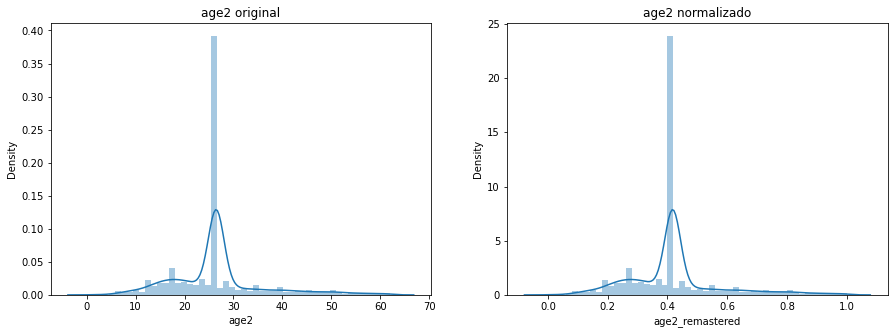

In [36]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age2 original')
axes[1].set_title('age2 normalizado')

sns.distplot(df['age2'] ,ax = axes[0])
sns.distplot(df['age2_remastered'], ax = axes[1])

👩🏽‍🦰👩🏽‍🦱💬   
Tenemos que explicarlo, con dibujitos

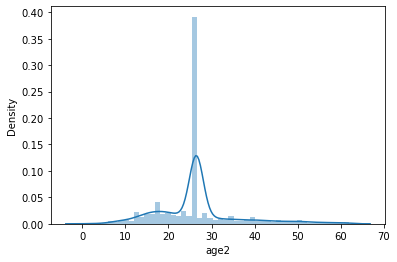

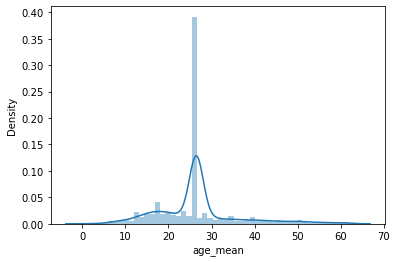

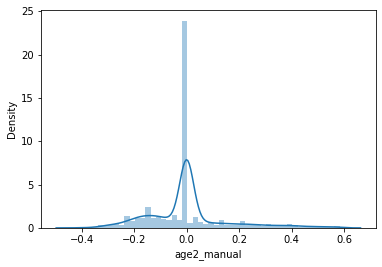

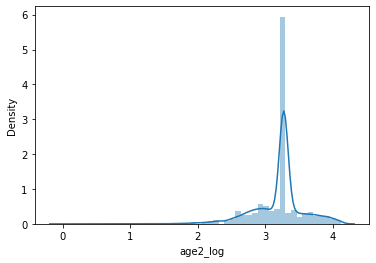

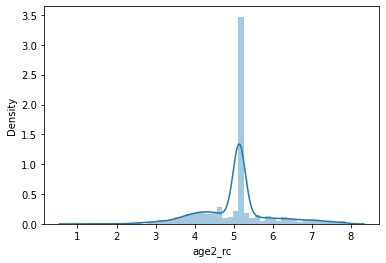

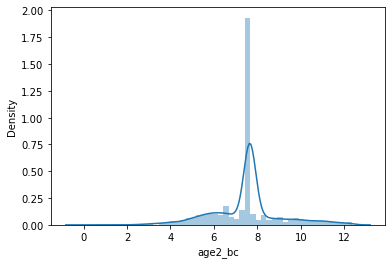

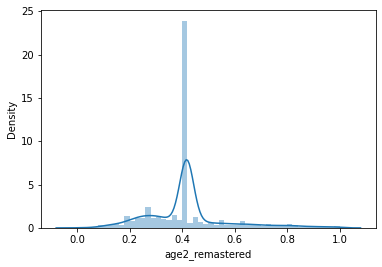

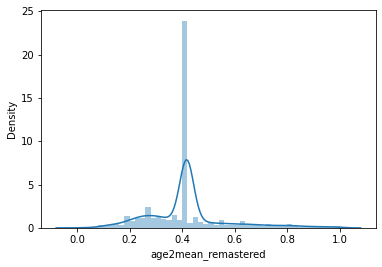

In [43]:
numericas = df.select_dtypes(include = np.number)
numericas.drop(["year", 'age2_fillna'], axis = 1, inplace = True)
for i in numericas.columns:
    sns.distplot(df[i]) #lista de todas las columnas normalizadas
    plt.show()

👩🏽‍🦰👩🏽‍🦱💬   

Estos métodos se usan para normalizar los datos de una variable, es decir, forzar que su distribución se ajuste a la camapana de Gauss.
Explicación de las gráficas:

1. y 2. Esta son las gráficas originales, sin normalizar.

3.Normalización manual, que es el dato menos la media dividido entre la diferencia del máximo y minímo

4.Transformación logarítmica -> No se puede hacer si alguno de los valores de la columna es menor que 0. Cambia divisiones del eje en escala logarítmica. Son números tan pequeños, que serán elevados en "e".

5.Transformación con raíz cuadrada-> No se puede hacer si alguno de los valores de la columna es menor que 0. Se hace la raíz cuadrada de los valores, por lo que son números bastante pequeños.

6.La Transformación Box-cox sólo se preocupa de calcular el valor de lambda que varía de - 5 a 5. La nuestra va de 0 a 12.

7. y 8. MinMaxScaller-> Principalmente va a transformar las variables escalando cada una de ellas a un rango determinado, por defecto lo hará entre 0-1



In [ ]:
df.to_csv("7.ataques_enproceso7.csv")